In [1]:
# Librerias y depenencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
#from catboost import CatBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
%matplotlib inline
# https://github.com/ortizcarlos/fraud_detection/blob/master/Financial%20fraud%20detection.ipynb


## Etapa 1: Analisis Exploratorio de datos

In [2]:
# Cargue de datos
df = pd.read_csv("EVERTEC_DS.csv")

#### Descripcion principales variables

- ID_TRX: Identificador único de transacción
- S_PAN: Número de tarjeta original
- S_ENCRYPTED_PAN: número de tarjeta encriptado. Los últimos 4 dígitos coinciden con lo del
- S_PAN
- F_AMOUNT_TRANSACTION: monto original de la transacción
- N_CURRENCY_CODE_TRANSACTION: moneda de la transacción - categórica
- F_DOLLAR_AMOUNT: monto expresado en dólares
- N_TRANSMISSION_DATE_AND_TIME: fecha de la transacción expresada de forma numérica
- N_MERCHANT_TYPE: clasificación de comercio - categórica
- N_ACQ_INSTITUTION_COUNTRY_CODE: código del país donde se realizó la transacción -categórica
- N_ENTRY_MODE: forma en que se ingresó la información de la tarjeta al momento de realizar la compra – categórica
- N_POINT_OF_SERV_COND_CODE: información sobre el POS donde se realizó la transacción – categórica
- S_MERCHANT_LEGAL_NAME: nombre legal del comercio
- FRAUDE: indica si la transacción fue o no fraude - OBJETIVO

In [3]:
# Lectura de las primeras 10filas
print("Longitud del dataset: ", df.shape)
df.tail(10)

Longitud del dataset:  (29240, 13)


,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE
29230,1618312961,411757******3034,1000051416573034,49.99,840,49.990,20211114042804,5815,840,100,59,APPLE.COM/BILL,1
29231,1623112246,494171******4087,1000249852384087,31.40,840,31.400,20211115194606,4215,591,10,59,PEDIDOS YA,1
29232,1623966109,477370******7006,1000043180407006,950.00,188,1.490,20211116084041,4121,372,102,59,UBR* PENDING.UBER.COM,0
29233,1631233148,423087******0006,1000195942220006,39.99,840,40.325,20211118180509,5818,840,100,59,APPLE.COM/BILL,0
29234,1634406940,415237******6308,1000252689406308,8616.45,340,357.449,20211119184835,5912,340,12,59,FARMACIAS KIELSA FICOL,1
29235,1640911789,423087******1008,1000198432161008,10.42,840,10.506,20211122111915,8999,591,10,59,SLS TRIP,0
29236,1641330999,423087******7004,1000198982267004,2.99,840,3.014,20211122133111,5816,826,102,59,PAYPAL *BOACOMPRA,0
29237,1654136929,423087******0006,1000117158860006,126.35,340,5.239,20211127131110,5816,826,102,59,PAYPAL *BOACOMPRA,0
29238,1655793681,478789******4134,1000199634524134,640.00,188,1.018,20211128080109,5816,528,10,59,GOOGLE lucydream game,0
29239,1662610375,472055******0785,1000248589180785,1.99,840,2.001,20211130192739,5735,840,100,59,APPLE.COM/BILL,0


In [4]:
# Información general del df | Identificación de valores nulos y/o faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29240 entries, 0 to 29239
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_TRX                          29240 non-null  int64  
 1   S_PAN                           29240 non-null  object 
 2   S_ENCRYPTED_PAN                 29240 non-null  int64  
 3   F_AMOUNT_TRANSACTION            29240 non-null  float64
 4   N_CURRENCY_CODE_TRANSACTION     29240 non-null  int64  
 5   F_DOLLAR_AMOUNT                 29240 non-null  float64
 6   N_TRANSMISSION_DATE_AND_TIME    29240 non-null  int64  
 7   N_MERCHANT_TYPE                 29240 non-null  int64  
 8   N_ACQ_INSTITUTION_COUNTRY_CODE  29240 non-null  int64  
 9   N_ENTRY_MODE                    29240 non-null  int64  
 10  N_POINT_OF_SERV_COND_CODE       29240 non-null  int64  
 11  S_MERCHANT_LEGAL_NAME           29240 non-null  object 
 12  FRAUDE                          

In [5]:
# Se oberva la distribución de la variable respuesta o variable de salida (Fraude)
# Claramente se observa un desbalance en el dataset, Se observa que muy pocos registros son fraudulentos
# Este desbalance de clases se debe tener en cuenta en la implementación del modelo.

df.FRAUDE.value_counts()

0    23392
1     5848
Name: FRAUDE, dtype: int64

Text(0.5, 1.0, 'Transacciones que no fueron fraude vs transacciones fraude')

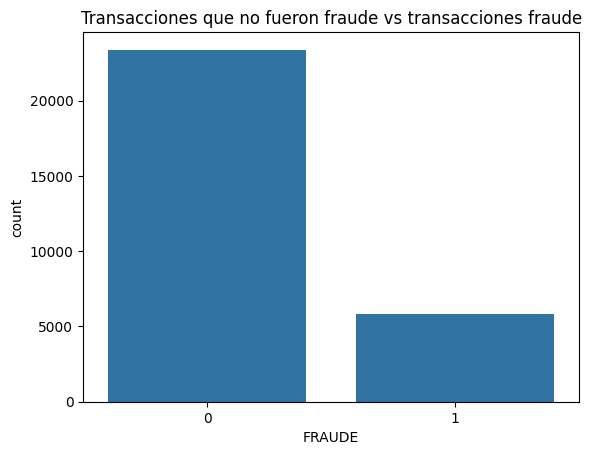

In [6]:
# Numero de transaccion que fueron fraude (1) vs No Fraude (0)
sns.countplot(x='FRAUDE', data = df)
plt.title("Transacciones que no fueron fraude vs transacciones fraude")


Text(0.5, 0, 'Monto Solicitado (dolares)')

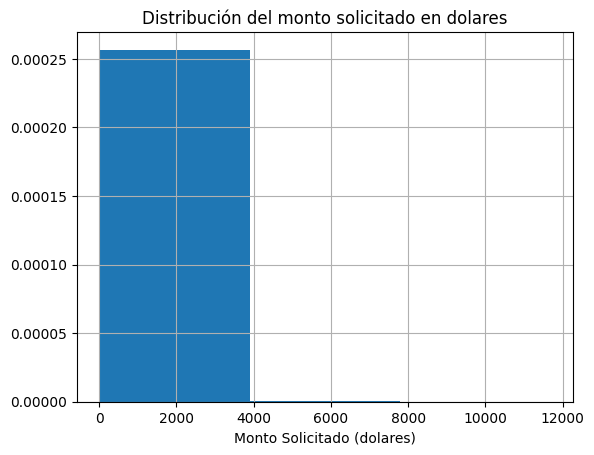

In [7]:
# Se realiza un histograma de la variable: F_DOLLAR_AMOUNT: monto transaccion expresado en dólares
df.F_DOLLAR_AMOUNT.hist(bins=3, density=True)
plt.title("Distribución del monto solicitado en dolares")
plt.xlabel("Monto Solicitado (dolares)")


In [8]:
df.F_DOLLAR_AMOUNT.describe()

count    29240.000000
mean        48.387343
std        272.210613
min          0.007000
25%          2.840000
50%          7.053500
75%         20.960000
max      11678.000000
Name: F_DOLLAR_AMOUNT, dtype: float64

Text(0.5, 0, 'Monto Solicitado (dolares)')

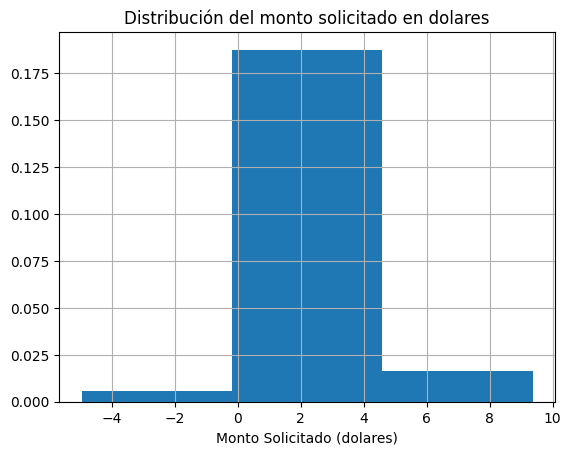

In [9]:
# Transformacion a la variable F_DOLLAR_AMOUNT para determinar el tipo de distribución
np.log(df.F_DOLLAR_AMOUNT).hist(bins=3, density=True)
plt.title("Distribución del monto solicitado en dolares")
plt.xlabel("Monto Solicitado (dolares)")

Text(0.5, 1.0, 'Monto Solicitado ($) -- status del Fraude')

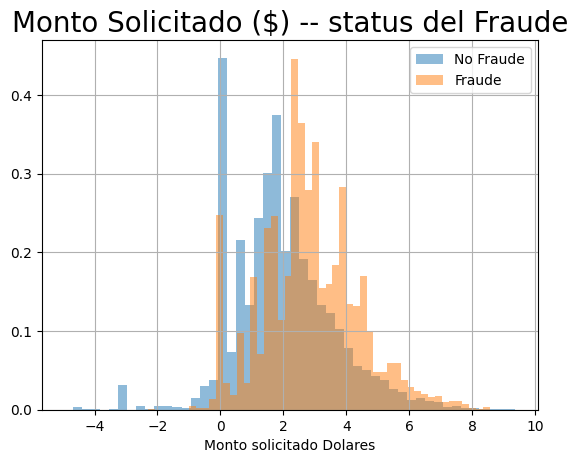

In [10]:
# ¿Como es la distribucion del monto solicitado entre las tranasaciones que fuero fraude vs las que no?

np.log(df.F_DOLLAR_AMOUNT[df.FRAUDE == 0]).hist(bins=50, density=True,alpha=0.5, label="No Fraude")
np.log(df.F_DOLLAR_AMOUNT[df.FRAUDE == 1]).hist(bins=50, density=True,alpha=0.5, label="Fraude")
plt.xlabel("Monto solicitado Dolares")
plt.legend()
plt.title("Monto Solicitado ($) -- status del Fraude", fontsize=20)

**Nota**:  Se ve que las distribuciones no son tan diferentes, por lo tanto el monto de la transaccion (dolares ) por si solo no no explica una fracción significativa de la diferencia en el estatus del Fraude

### Exploracion del monto solicitado ($) con otras variables

In [11]:
df.N_TRANSMISSION_DATE_AND_TIME

0        20201001190732
1        20201001194719
2        20201002095534
3        20201004101419
4        20201005173241
              ...      
29235    20211122111915
29236    20211122133111
29237    20211127131110
29238    20211128080109
29239    20211130192739
Name: N_TRANSMISSION_DATE_AND_TIME, Length: 29240, dtype: int64

In [12]:
# Clasificacion  del comercio 
df.N_MERCHANT_TYPE.value_counts()

4121    4769
5816    3169
5812    1745
5818    1553
5815    1327
        ... 
8734       1
3357       1
3007       1
3750       1
5970       1
Name: N_MERCHANT_TYPE, Length: 221, dtype: int64

In [13]:
# Forma en que se ingreso la informacion a la targeta al momento de realizar la compra
# Existen 5 formas diferentes en las que se ingreso la información 
df.N_ENTRY_MODE.value_counts()

10     14666
100     8166
102     3704
12      2688
11        16
Name: N_ENTRY_MODE, dtype: int64

In [14]:
# Tipos de post- Hace referencia a donde se realizo la transacción
#  terminales POS  (Point of Sale): Se trata de un sistema mediante el cual los clientes pueden realizar pagos por los servicios y productos que adquieren.
# Existen 2 tipos de categorias
df.N_POINT_OF_SERV_COND_CODE.value_counts()

59    28999
1       241
Name: N_POINT_OF_SERV_COND_CODE, dtype: int64

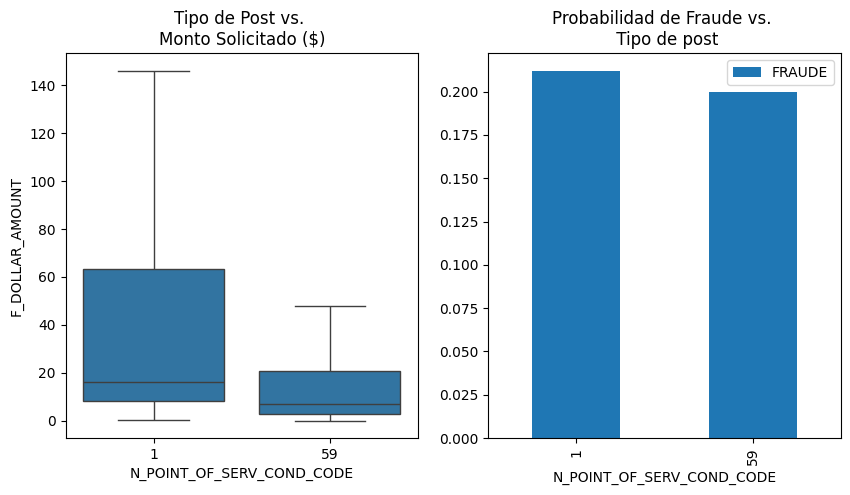

In [15]:
# Se intenta graficar ahora el monto solicitado ($) vs algunas variables categoricas para identifcar algun tipo de relación
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.boxplot(x='N_POINT_OF_SERV_COND_CODE', y = 'F_DOLLAR_AMOUNT', data = df, showfliers=False, ax =ax1)
ax1.set_title("Tipo de Post vs. \nMonto Solicitado ($)")
df[["N_POINT_OF_SERV_COND_CODE",'FRAUDE']].groupby("N_POINT_OF_SERV_COND_CODE").mean().plot.bar(rot=90,ax =ax2)
plt.title("Probabilidad de Fraude vs. \n Tipo de post");


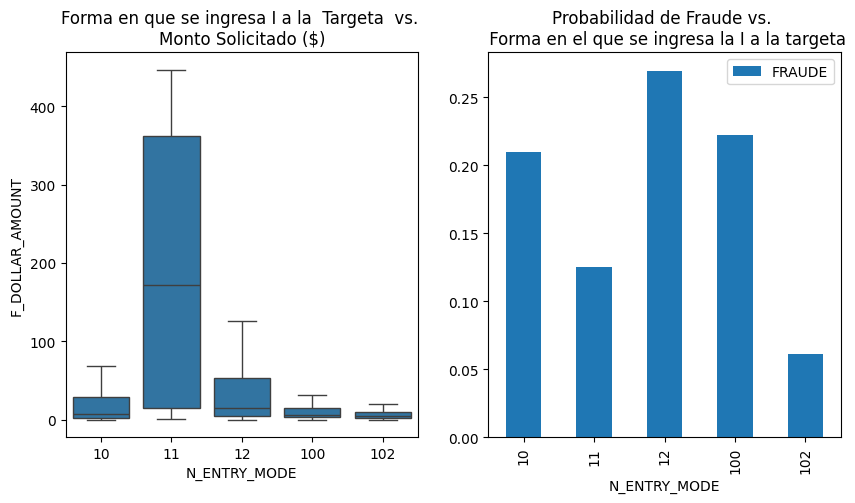

In [16]:
# N_ENTRY_MODE: forma en que se ingresó la información de la tarjeta al momento de realizar la compra
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey= False)
sns.boxplot(x='N_ENTRY_MODE', y = 'F_DOLLAR_AMOUNT', data = df, showfliers=False, ax =ax1)
ax1.set_title("Forma en que se ingresa I a la  Targeta  vs. \nMonto Solicitado ($)")
df[["N_ENTRY_MODE",'FRAUDE']].groupby("N_ENTRY_MODE").mean().plot.bar(rot=90,ax =ax2)
plt.title("Probabilidad de Fraude vs. \n Forma en el que se ingresa la I a la targeta");

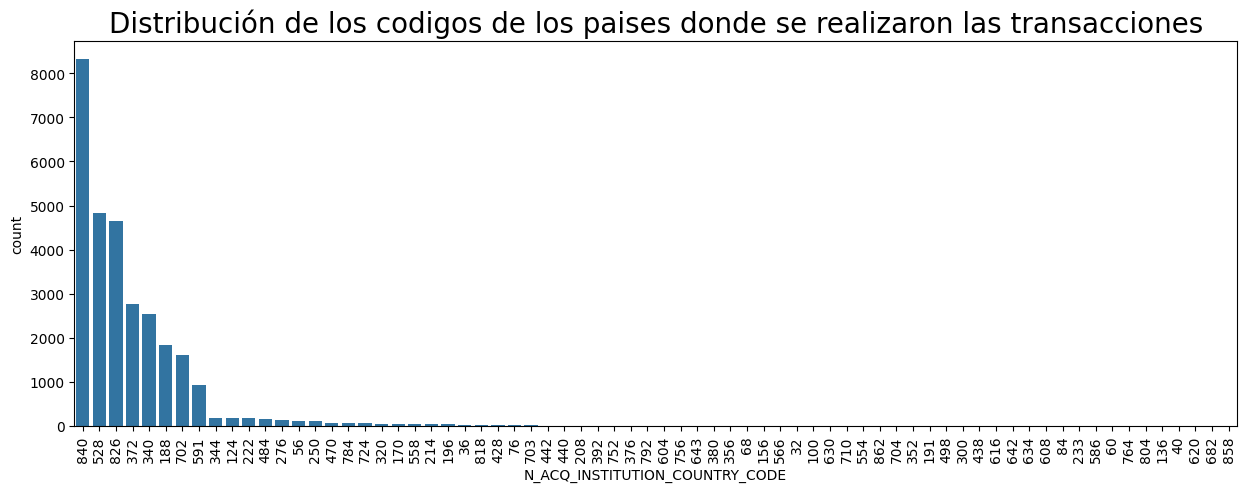

In [17]:
# Distribucion de los paises donde se realiza las transacciones
plt.figure(figsize= (15,5))
sns.countplot(x='N_ACQ_INSTITUTION_COUNTRY_CODE', order=df.N_ACQ_INSTITUTION_COUNTRY_CODE.value_counts().index, data = df)
plt.xticks(rotation=90)
plt.title("Distribución de los codigos de los paises donde se realizaron las transacciones", fontsize=20);


Text(0.5, 1.0, 'Probabilidad de fraude según el codigo del pais')

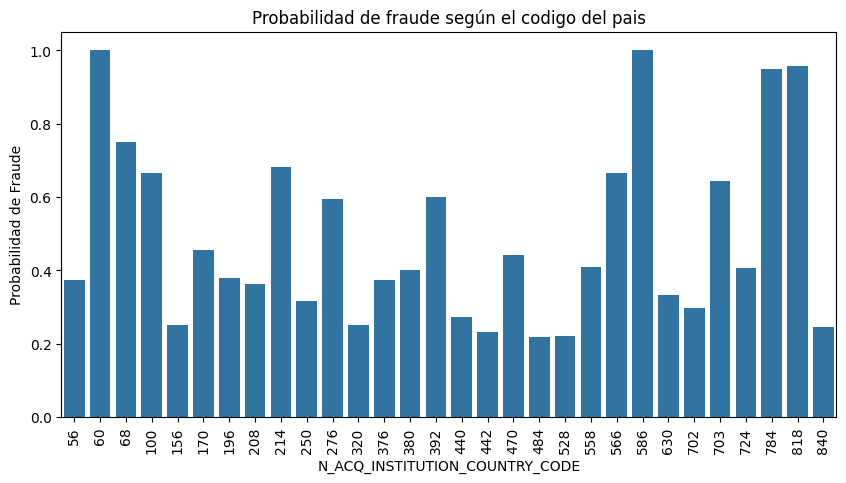

In [18]:
plt.figure(figsize= (10,5))
pais_fraude = df[["FRAUDE", "N_ACQ_INSTITUTION_COUNTRY_CODE"]].groupby("N_ACQ_INSTITUTION_COUNTRY_CODE").mean()
pais_fraude = pais_fraude.sort_values(by="FRAUDE",axis=0,ascending=False)
sns.barplot(x=pais_fraude.index[:30],
y=pais_fraude["FRAUDE"][:30].values,orient="v")
plt.xticks(rotation=90)
plt.ylabel("Probabilidad de Fraude");
plt.title("Probabilidad de fraude según el codigo del pais")


Text(0.5, 1.0, 'Distribución del tipo de comercio donde se realizaron las transacciones')

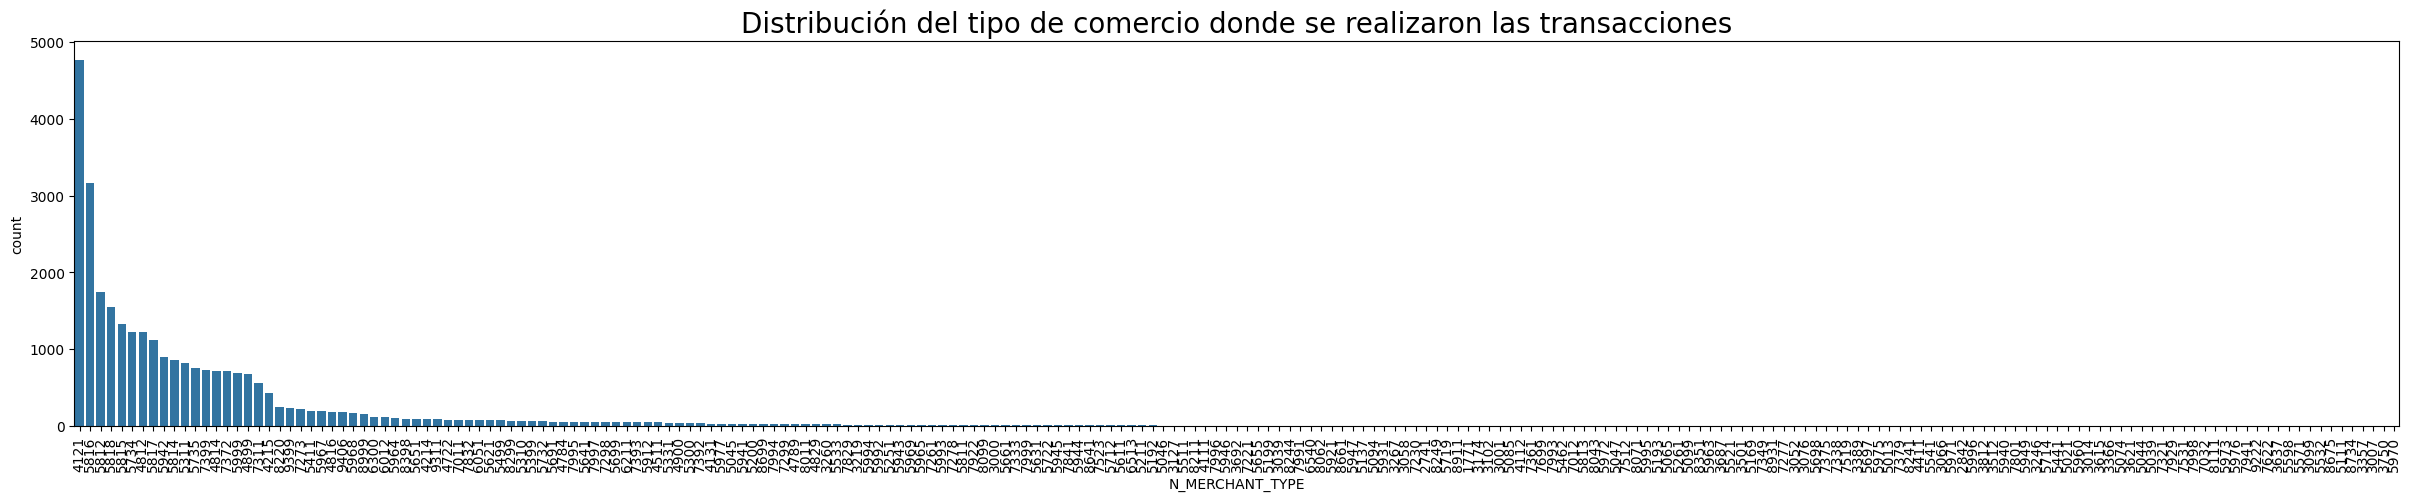

In [19]:
# Distribucion de los tipos de comercio donde se realizo al transacción
plt.figure(figsize= (30,5))
sns.countplot(x='N_MERCHANT_TYPE', order=df.N_MERCHANT_TYPE.value_counts().index, data = df)
plt.xticks(rotation=90)
plt.title("Distribución del tipo de comercio donde se realizaron las transacciones", fontsize=20)

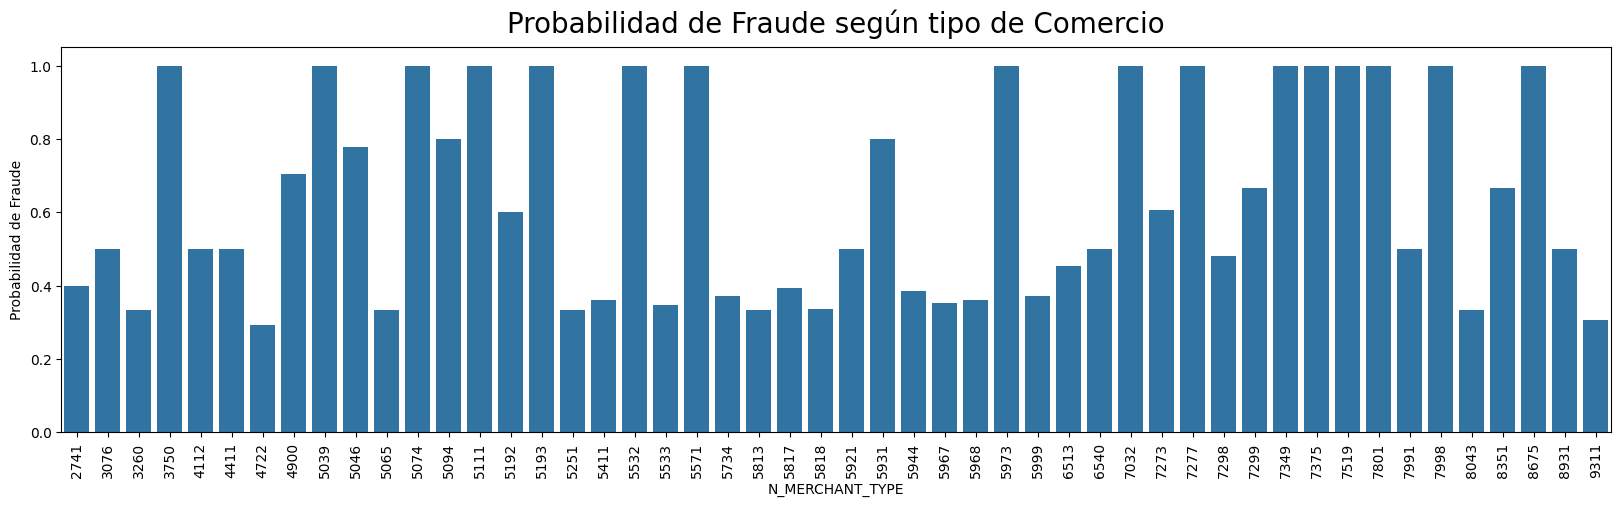

In [20]:
# Probalilidad de fraude deacuerdo a los tipos de comercio
plt.figure(figsize= (20,5))
df_tipocomercio_fraude = df[["FRAUDE", "N_MERCHANT_TYPE"]].groupby("N_MERCHANT_TYPE").mean()
df_tipocomercio_fraude = df_tipocomercio_fraude.sort_values(by="FRAUDE",axis=0, ascending=False)
sns.barplot(x=df_tipocomercio_fraude.index[:50],
y=df_tipocomercio_fraude["FRAUDE"][:50].values,orient="v")
plt.xticks(rotation=90)
plt.ylabel("Probabilidad de Fraude")
plt.title("Probabilidad de Fraude según tipo de Comercio", fontsize=20,verticalalignment='bottom');


## 2. Seleccion de caracteristicas

In [21]:
# Tipos de variables del dataset
df.dtypes

ID_TRX                              int64
S_PAN                              object
S_ENCRYPTED_PAN                     int64
F_AMOUNT_TRANSACTION              float64
N_CURRENCY_CODE_TRANSACTION         int64
F_DOLLAR_AMOUNT                   float64
N_TRANSMISSION_DATE_AND_TIME        int64
N_MERCHANT_TYPE                     int64
N_ACQ_INSTITUTION_COUNTRY_CODE      int64
N_ENTRY_MODE                        int64
N_POINT_OF_SERV_COND_CODE           int64
S_MERCHANT_LEGAL_NAME              object
FRAUDE                              int64
dtype: object

In [22]:
df.head()

,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE
0,508924809,488245******4567,1000065275814567,5.4,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0
1,509028097,410443******1014,1000126292771014,3350.0,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0
2,511351088,434527******5015,1000007433745015,10.8,840,10.800,20201002095534,4816,840,10,59,Google LLC GSUITE_iyta,0
3,515833505,410443******0018,1000126530570018,4960.8,188,8.280,20201004101419,4814,188,10,59,RAPPI,0
4,519145453,478787******2328,1000020382542328,40250.0,188,67.177,20201005173241,5661,188,10,59,FLEXI SHOES,0


In [23]:
# Conversion a variables categoricas
# Se crea una cpia del df original N_POINT_OF_SERV_COND_CODE
dff = df.copy()
dff.N_CURRENCY_CODE_TRANSACTION = dff.N_CURRENCY_CODE_TRANSACTION.astype('category')
dff.N_MERCHANT_TYPE = dff.N_MERCHANT_TYPE.astype('category')
dff.N_ACQ_INSTITUTION_COUNTRY_CODE = dff.N_ACQ_INSTITUTION_COUNTRY_CODE.astype('category')
dff.N_ENTRY_MODE = dff.N_ENTRY_MODE.astype('category')
dff.N_POINT_OF_SERV_COND_CODE= dff.N_POINT_OF_SERV_COND_CODE.astype('category')


In [24]:
dff

,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE
0,508924809,488245******4567,1000065275814567,5.40,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0
1,509028097,410443******1014,1000126292771014,3350.00,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0
2,511351088,434527******5015,1000007433745015,10.80,840,10.800,20201002095534,4816,840,10,59,Google LLC GSUITE_iyta,0
3,515833505,410443******0018,1000126530570018,4960.80,188,8.280,20201004101419,4814,188,10,59,RAPPI,0
4,519145453,478787******2328,1000020382542328,40250.00,188,67.177,20201005173241,5661,188,10,59,FLEXI SHOES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,1640911789,423087******1008,1000198432161008,10.42,840,10.506,20211122111915,8999,591,10,59,SLS TRIP,0
29236,1641330999,423087******7004,1000198982267004,2.99,840,3.014,20211122133111,5816,826,102,59,PAYPAL *BOACOMPRA,0
29237,1654136929,423087******0006,1000117158860006,126.35,340,5.239,20211127131110,5816,826,102,59,PAYPAL *BOACOMPRA,0
29238,1655793681,478789******4134,1000199634524134,640.00,188,1.018,20211128080109,5816,528,10,59,GOOGLE lucydream game,0


In [25]:
# Tratamiento de la variable tiempo: _TRANSMISSION_DATE_AND_TIME
dff["Real_date"] = df.N_TRANSMISSION_DATE_AND_TIME.apply(lambda x: pd.to_datetime(str(x)))

In [26]:
dff["Year_Transaction"] = dff["Real_date"].dt.year
dff["Month_Transaction"] = dff["Real_date"].dt.month
dff["DayTransaction"] = dff["Real_date"].dt.day

In [27]:
dff.head(5)

,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE,Real_date,Year_Transaction,Month_Transaction,DayTransaction
0,508924809,488245******4567,1000065275814567,5.4,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0,2020-10-01 19:07:32,2020,10,1
1,509028097,410443******1014,1000126292771014,3350.0,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0,2020-10-01 19:47:19,2020,10,1
2,511351088,434527******5015,1000007433745015,10.8,840,10.800,20201002095534,4816,840,10,59,Google LLC GSUITE_iyta,0,2020-10-02 09:55:34,2020,10,2
3,515833505,410443******0018,1000126530570018,4960.8,188,8.280,20201004101419,4814,188,10,59,RAPPI,0,2020-10-04 10:14:19,2020,10,4
4,519145453,478787******2328,1000020382542328,40250.0,188,67.177,20201005173241,5661,188,10,59,FLEXI SHOES,0,2020-10-05 17:32:41,2020,10,5


In [28]:
# Verificaicon de los tipos de datos
dff.dtypes

ID_TRX                                     int64
S_PAN                                     object
S_ENCRYPTED_PAN                            int64
F_AMOUNT_TRANSACTION                     float64
N_CURRENCY_CODE_TRANSACTION             category
F_DOLLAR_AMOUNT                          float64
N_TRANSMISSION_DATE_AND_TIME               int64
N_MERCHANT_TYPE                         category
N_ACQ_INSTITUTION_COUNTRY_CODE          category
N_ENTRY_MODE                            category
N_POINT_OF_SERV_COND_CODE               category
S_MERCHANT_LEGAL_NAME                     object
FRAUDE                                     int64
Real_date                         datetime64[ns]
Year_Transaction                           int64
Month_Transaction                          int64
DayTransaction                             int64
dtype: object

In [29]:
# Se obtiene la matriz de correlacion de las variables numericas
dff.corr()

C:\Users\German\AppData\Local\Temp\ipykernel_11760\2302797582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr()


,ID_TRX,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,FRAUDE,Year_Transaction,Month_Transaction,DayTransaction
ID_TRX,1.000000,0.262824,-0.007098,0.005271,0.735479,-0.010028,0.685339,0.180126,0.067013
S_ENCRYPTED_PAN,0.262824,1.000000,-0.009806,-0.022294,0.182428,-0.134665,0.168609,0.060403,0.042098
F_AMOUNT_TRANSACTION,-0.007098,-0.009806,1.000000,0.011241,-0.002815,-0.001581,-0.002263,-0.005025,0.002185
F_DOLLAR_AMOUNT,0.005271,-0.022294,0.011241,1.000000,0.008278,0.040964,0.008300,-0.004589,-0.012236
N_TRANSMISSION_DATE_AND_TIME,0.735479,0.182428,-0.002815,0.008278,1.000000,0.083389,0.997440,-0.530606,-0.013576
FRAUDE,-0.010028,-0.134665,-0.001581,0.040964,0.083389,1.000000,0.090440,-0.129987,-0.017076
Year_Transaction,0.685339,0.168609,-0.002263,0.008300,0.997440,0.090440,1.000000,-0.589834,-0.016366
Month_Transaction,0.180126,0.060403,-0.005025,-0.004589,-0.530606,-0.129987,-0.589834,1.000000,0.014485
DayTransaction,0.067013,0.042098,0.002185,-0.012236,-0.013576,-0.017076,-0.016366,0.014485,1.000000


In [30]:
# Se eliminan  variables del dataset original
dff

,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE,Real_date,Year_Transaction,Month_Transaction,DayTransaction
0,508924809,488245******4567,1000065275814567,5.40,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0,2020-10-01 19:07:32,2020,10,1
1,509028097,410443******1014,1000126292771014,3350.00,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0,2020-10-01 19:47:19,2020,10,1
2,511351088,434527******5015,1000007433745015,10.80,840,10.800,20201002095534,4816,840,10,59,Google LLC GSUITE_iyta,0,2020-10-02 09:55:34,2020,10,2
3,515833505,410443******0018,1000126530570018,4960.80,188,8.280,20201004101419,4814,188,10,59,RAPPI,0,2020-10-04 10:14:19,2020,10,4
4,519145453,478787******2328,1000020382542328,40250.00,188,67.177,20201005173241,5661,188,10,59,FLEXI SHOES,0,2020-10-05 17:32:41,2020,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,1640911789,423087******1008,1000198432161008,10.42,840,10.506,20211122111915,8999,591,10,59,SLS TRIP,0,2021-11-22 11:19:15,2021,11,22
29236,1641330999,423087******7004,1000198982267004,2.99,840,3.014,20211122133111,5816,826,102,59,PAYPAL *BOACOMPRA,0,2021-11-22 13:31:11,2021,11,22
29237,1654136929,423087******0006,1000117158860006,126.35,340,5.239,20211127131110,5816,826,102,59,PAYPAL *BOACOMPRA,0,2021-11-27 13:11:10,2021,11,27
29238,1655793681,478789******4134,1000199634524134,640.00,188,1.018,20211128080109,5816,528,10,59,GOOGLE lucydream game,0,2021-11-28 08:01:09,2021,11,28


## Modelado

In [31]:
print("Columnas dataset: ", df.columns)
df.head(5)


Columnas dataset:  Index(['ID_TRX', 'S_PAN', 'S_ENCRYPTED_PAN', 'F_AMOUNT_TRANSACTION',
       'N_CURRENCY_CODE_TRANSACTION', 'F_DOLLAR_AMOUNT',
       'N_TRANSMISSION_DATE_AND_TIME', 'N_MERCHANT_TYPE',
       'N_ACQ_INSTITUTION_COUNTRY_CODE', 'N_ENTRY_MODE',
       'N_POINT_OF_SERV_COND_CODE', 'S_MERCHANT_LEGAL_NAME', 'FRAUDE'],
      dtype='object')


,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE
0,508924809,488245******4567,1000065275814567,5.4,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0
1,509028097,410443******1014,1000126292771014,3350.0,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0
2,511351088,434527******5015,1000007433745015,10.8,840,10.800,20201002095534,4816,840,10,59,Google LLC GSUITE_iyta,0
3,515833505,410443******0018,1000126530570018,4960.8,188,8.280,20201004101419,4814,188,10,59,RAPPI,0
4,519145453,478787******2328,1000020382542328,40250.0,188,67.177,20201005173241,5661,188,10,59,FLEXI SHOES,0


In [32]:
var_elim = ["ID_TRX", "S_PAN", "S_ENCRYPTED_PAN",  "S_MERCHANT_LEGAL_NAME", "N_TRANSMISSION_DATE_AND_TIME","Real_date","FRAUDE"]
# Se definen las variables dependientes | variables independientes
data_features = dff.drop(var_elim,axis=1)
data_target = dff.FRAUDE
# Division del conjunto de datos (70% training , 30% testing)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,  train_size = 0.70, test_size = 0.30, random_state = 123)
print("Conjunto de Entrenamiento Variables Independientes: ", X_train.shape)
print("Conjunto de Entrenamiento Variables Dependiente: ", y_train.shape)
print("Conjunto de Test Variables Independientes: ", X_test.shape)
print("Conjunto de Test Variables Dependientes: ", y_test.shape)


Conjunto de Entrenamiento Variables Independientes:  (20468, 10)
Conjunto de Entrenamiento Variables Dependiente:  (20468,)
Conjunto de Test Variables Independientes:  (8772, 10)
Conjunto de Test Variables Dependientes:  (8772,)


### Primer Modelo : Regresion Logistica

In [33]:
# Implementación de una regresion logistica
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
matrix = confusion_matrix(y_test, pred)

c:\Users\German\.conda\envs\pycaret\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El acuracy logrado para la regresion logistica es de : 80.0 %
El Recall del modelo es:  0.0017113519680547634
La Presicion del modelo es :  0.42857142857142855


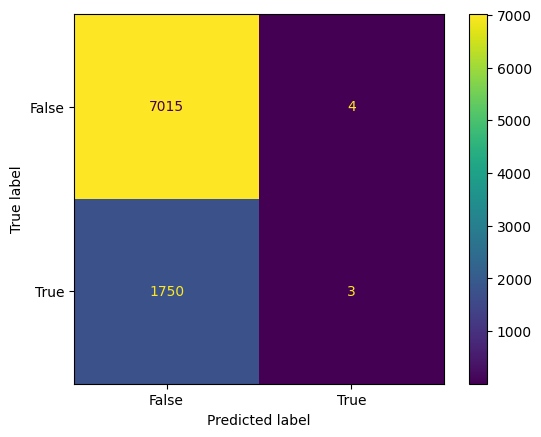

In [36]:
# Metricas de desempeño Acuracy  | Matriz de confusion 
# Acuracy
score_lr = round(accuracy_score(pred,y_test)*100,2)
print("El acuracy logrado para la regresion logistica es de : "+str(score_lr)+" %")
# Recall
re = recall_score(y_test, pred,)
print("El Recall del modelo es: ", re)
# Precision
ps = precision_score(y_test, pred)
print("La Presicion del modelo es : ", ps)
graficar_matrix_confusion(matrix)

In [35]:
# Crear la visualización de la matriz de confusión
def graficar_matrix_confusion(matrix):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()


### Implementación segundo modelo arbol de desición

In [37]:
# Se construye el modelo
clf_new = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
clf_new = clf_new.fit(X_train, y_train)

# Se realiza la predicción
y_pred_train = clf_new.predict(X_train)
y_pred_test = clf_new.predict(X_test)

print(f"Exactitud en el conjunto de entrenamiento: {accuracy_score(y_train, y_pred_train)}")
print(f"Exactitud en las otras muestras (test): {accuracy_score(y_test, y_pred_test)}")

Exactitud en el conjunto de entrenamiento: 0.9179206566347469
Exactitud en las otras muestras (test): 0.8456452348381213


Acuracy:  0.8456452348381213
Recall 0.5550484883057616
Presicion:  0.6289592760180995


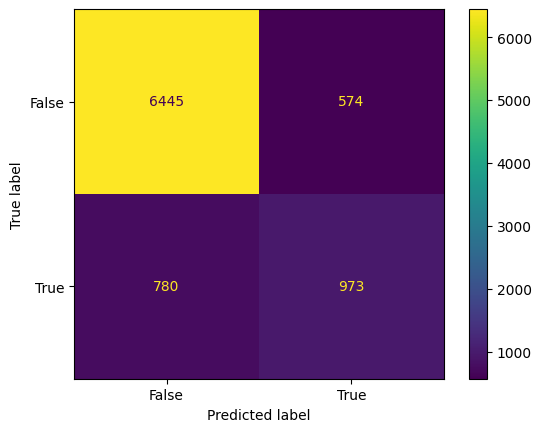

In [38]:
mc_m2 = confusion_matrix(y_test, y_pred_test)
# Accuracy
ac = accuracy_score(y_test, y_pred_test)
print("Acuracy: ", ac)
# Recall
re = recall_score(y_test, y_pred_test)
print("Recall", re)
# Precision
ps = precision_score(y_test, y_pred_test)
print("Presicion: ", ps)
graficar_matrix_confusion(mc_m2)

**Nota**

## Automatización del proceso haciendo uso de pycaret

**Pycaret**: 

In [57]:
# Librerias y dependencias
from pycaret.classification import *

In [58]:
dff.head(2)

,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE,Real_date,Year_Transaction,Month_Transaction,DayTransaction
0,508924809,488245******4567,1000065275814567,5.4,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0,2020-10-01 19:07:32,2020,10,1
1,509028097,410443******1014,1000126292771014,3350.0,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0,2020-10-01 19:47:19,2020,10,1


In [59]:
# Variablea a eliminar 
var_drop = ["N_TRANSMISSION_DATE_AND_TIME","Real_date"]
dff_pycaret =  dff.drop(var_drop, axis=1)


In [60]:
s = setup(data = dff_pycaret, target = 'FRAUDE', session_id=123)

,Description,Value
0,Session id,123
1,Target,FRAUDE
2,Target type,Binary
3,Original data shape,"(29240, 15)"
4,Transformed data shape,"(29240, 19)"
5,Transformed train set shape,"(20468, 19)"
6,Transformed test set shape,"(8772, 19)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,7


In [54]:
# Se comparan diferentes modelos de clasificación
# Se selecciona el mejor modelo deacuedo a las diferentes metricas de desempeño (Color Amarillo)
# Se selecciona el mejor modelo en este caso es Extra Trees Classifier
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:28:39
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9055,0.9227,0.6392,0.8514,0.7298,0.6740,0.6844,1.6880
rf,Random Forest Classifier,0.9025,0.9268,0.6075,0.8652,0.7132,0.6567,0.6719,2.0920
lightgbm,Light Gradient Boosting Machine,0.8782,0.9081,0.5325,0.7914,0.6359,0.5662,0.5826,0.3090
knn,K Neighbors Classifier,0.8627,0.8643,0.6744,0.6519,0.6628,0.5766,0.5768,0.2350
dt,Decision Tree Classifier,0.8557,0.7902,0.6810,0.6291,0.6539,0.5629,0.5638,0.1130
gbc,Gradient Boosting Classifier,0.8424,0.8562,0.3188,0.7497,0.4469,0.3721,0.4187,1.4390
ada,Ada Boost Classifier,0.8199,0.8143,0.2675,0.6147,0.3726,0.2860,0.3200,0.5320
lr,Logistic Regression,0.8000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1080
nb,Naive Bayes,0.8000,0.6431,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780
dummy,Dummy Classifier,0.8000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0860


In [50]:
# Optimización del mejor modelo - Ajuste de hiperparametros
# Validacion cruzada (K-forders = 10)
tune_best = tune_model(estimator=best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8002,0.7679,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8012,0.7638,0.0049,1.0000,0.0097,0.0078,0.0626
2,0.8021,0.7470,0.0098,1.0000,0.0194,0.0156,0.0886
3,0.8007,0.7636,0.0024,1.0000,0.0049,0.0039,0.0442
4,0.8002,0.7710,0.0024,1.0000,0.0049,0.0039,0.0442
5,0.8002,0.7547,0.0024,1.0000,0.0049,0.0039,0.0442
6,0.8002,0.7507,0.0024,1.0000,0.0049,0.0039,0.0442
7,0.8007,0.7527,0.0049,1.0000,0.0097,0.0078,0.0625
8,0.8001,0.7688,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
# Evaluacion del mejor modelo deacuerdo a las metricas de desempeño 
evaluate_model(tune_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
# functional API
predictions = predict_model(best, data=dff_pycaret)
predictions.head(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9739,0.9936,0.9030,0.9642,0.9326,0.9165,0.9172


,ID_TRX,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,Year_Transaction,Month_Transaction,DayTransaction,FRAUDE,prediction_label,prediction_score
0,508924809,1000065275814567,5.400000,840,5.388000,7372,840,10,59,2020,10,1,0,0,0.98
1,509028097,1000126292771014,3350.000000,188,5.570000,4121,372,102,59,2020,10,1,0,0,1.00
2,511351088,1000007433745015,10.800000,840,10.800000,4816,840,10,59,2020,10,2,0,0,1.00
3,515833505,1000126530570018,4960.799805,188,8.280000,4814,188,10,59,2020,10,4,0,0,1.00
4,519145453,1000020382542328,40250.000000,188,67.177002,5661,188,10,59,2020,10,5,0,0,1.00


## Implementacion segundo modelo  catBoost